In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox


In [4]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('Data/Processed/final_df.csv')

In [6]:
df.head()

,Unnamed: 0,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genre,popularity_artist,followers_artist,mood
0,0,160725,1,35,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,0.578,1.000,0.685,0.583,german,45.0,16826.0,Sad
1,1,322933,0,49,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,0.030,0.659,0.712,0.717,club,67.0,1517867.0,Angry
2,2,515360,0,0,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,0.832,0.996,0.052,0.322,minimal-techno,50.0,629106.0,Angry
3,3,190203,0,62,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,0.103,1.000,0.339,0.473,hip-hop,56.5,1396958.0,Happy
4,4,331240,0,20,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,0.622,1.000,0.011,0.160,minimal-techno,62.0,1172268.0,Sad


In [7]:
df.columns

Index(['Unnamed: 0', 'duration_ms', 'explicit', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'genre', 'popularity_artist', 'followers_artist',
       'mood'],
      dtype='object')

In [8]:
df  = df.drop(columns=['Unnamed: 0'])

In [10]:
df.to_csv('Data/Processed/final_df.csv')

In [11]:
def plot_num(to_plot, title):
    # Select the relevant columns from the DataFrame
    df_num_to_plot = df[to_plot]

    # Determine the number of subplots needed
    num_vars = len(to_plot)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_vars + cols - 1) // cols  # Ceiling division to determine rows

    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 3 * rows))

    # Flatten axes array for easy iteration in case of single row/column
    axes = axes.flatten() if num_vars > 1 else [axes]

    # Plot each variable
    for i, var in enumerate(df_num_to_plot.columns):
        df_num_to_plot[var].plot(kind="kde", ax=axes[i])
        axes[i].set_title(var)
        axes[i].grid(True)  # Optional: Add grid for better readability

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)  # Adjust font size as needed

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
    plt.show()


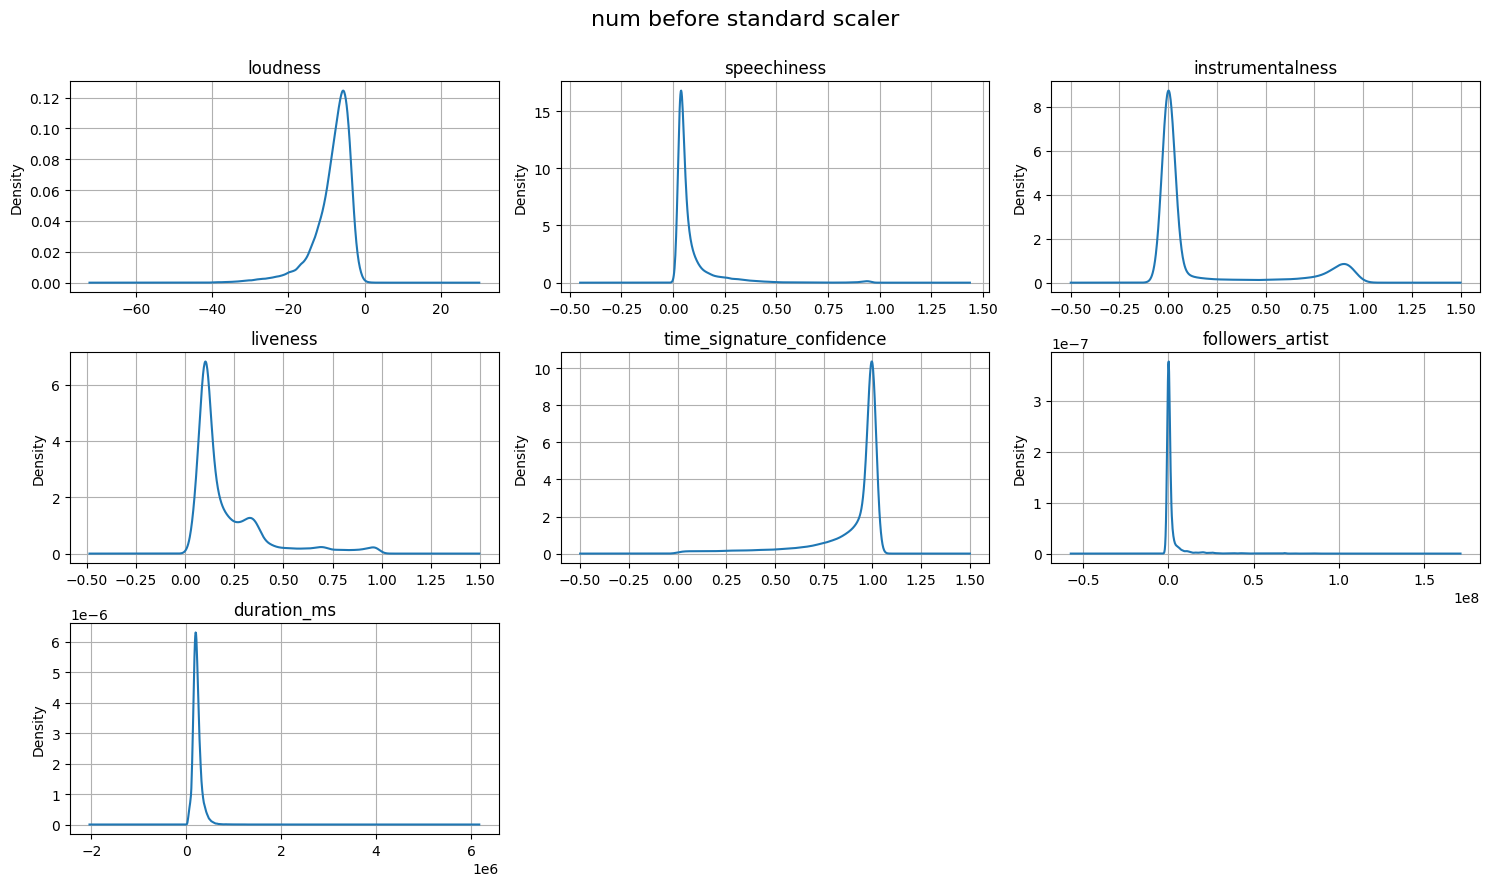

In [12]:
to_plot = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 
     'time_signature_confidence', 'followers_artist', 'duration_ms']

plot_num(to_plot, "num before standard scaler")

In [13]:

num =['duration_ms', 'popularity', 'danceability', 'energy',
        'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'popularity_artist','followers_artist']



cat = ['explicit', 'key','mode','time_signature','genre', 'mood' ]


In [14]:
df_num = df[num]

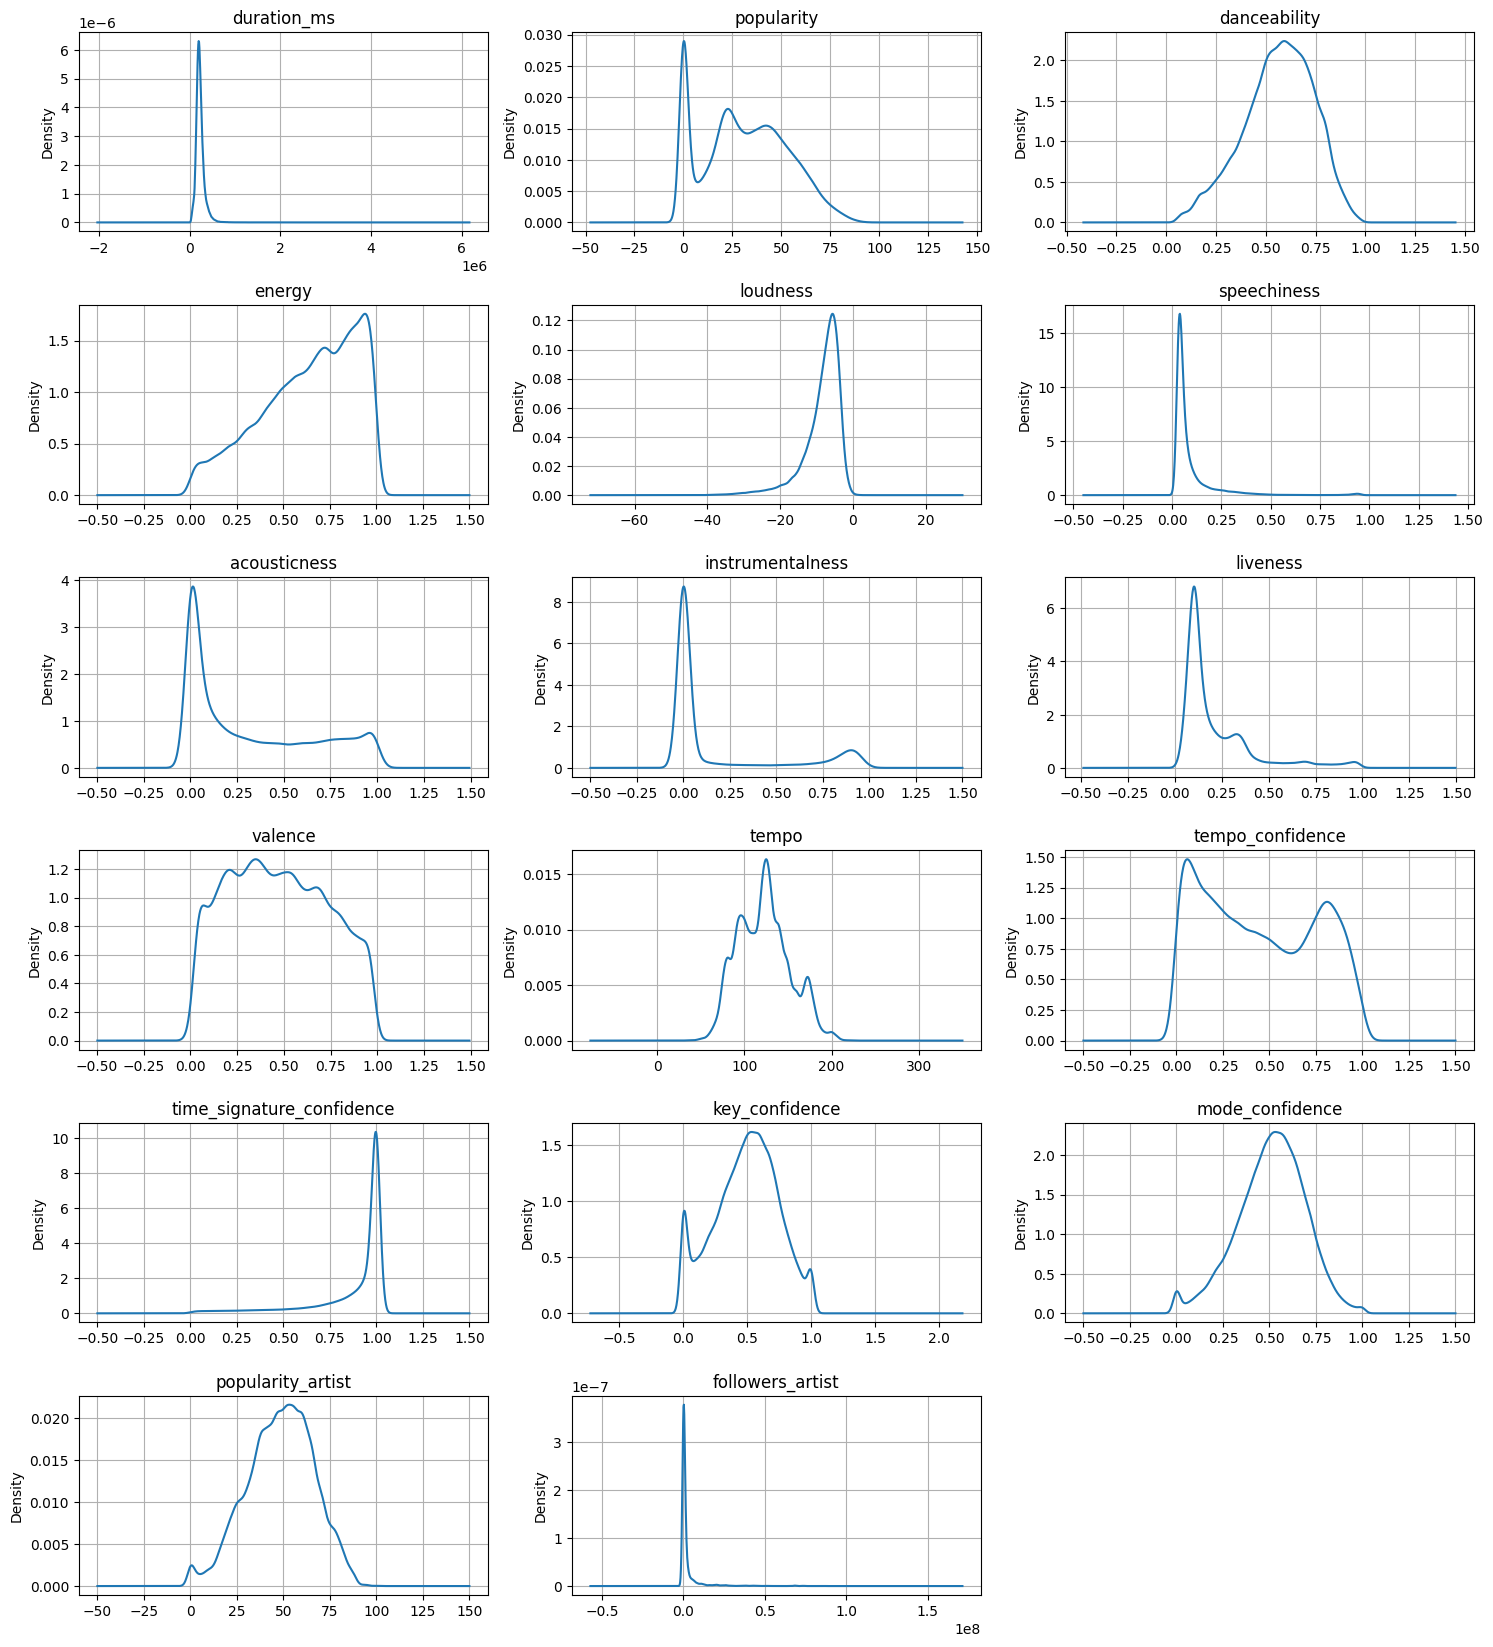

In [15]:
plot_num(num, "")

duration_speechiness_loudness

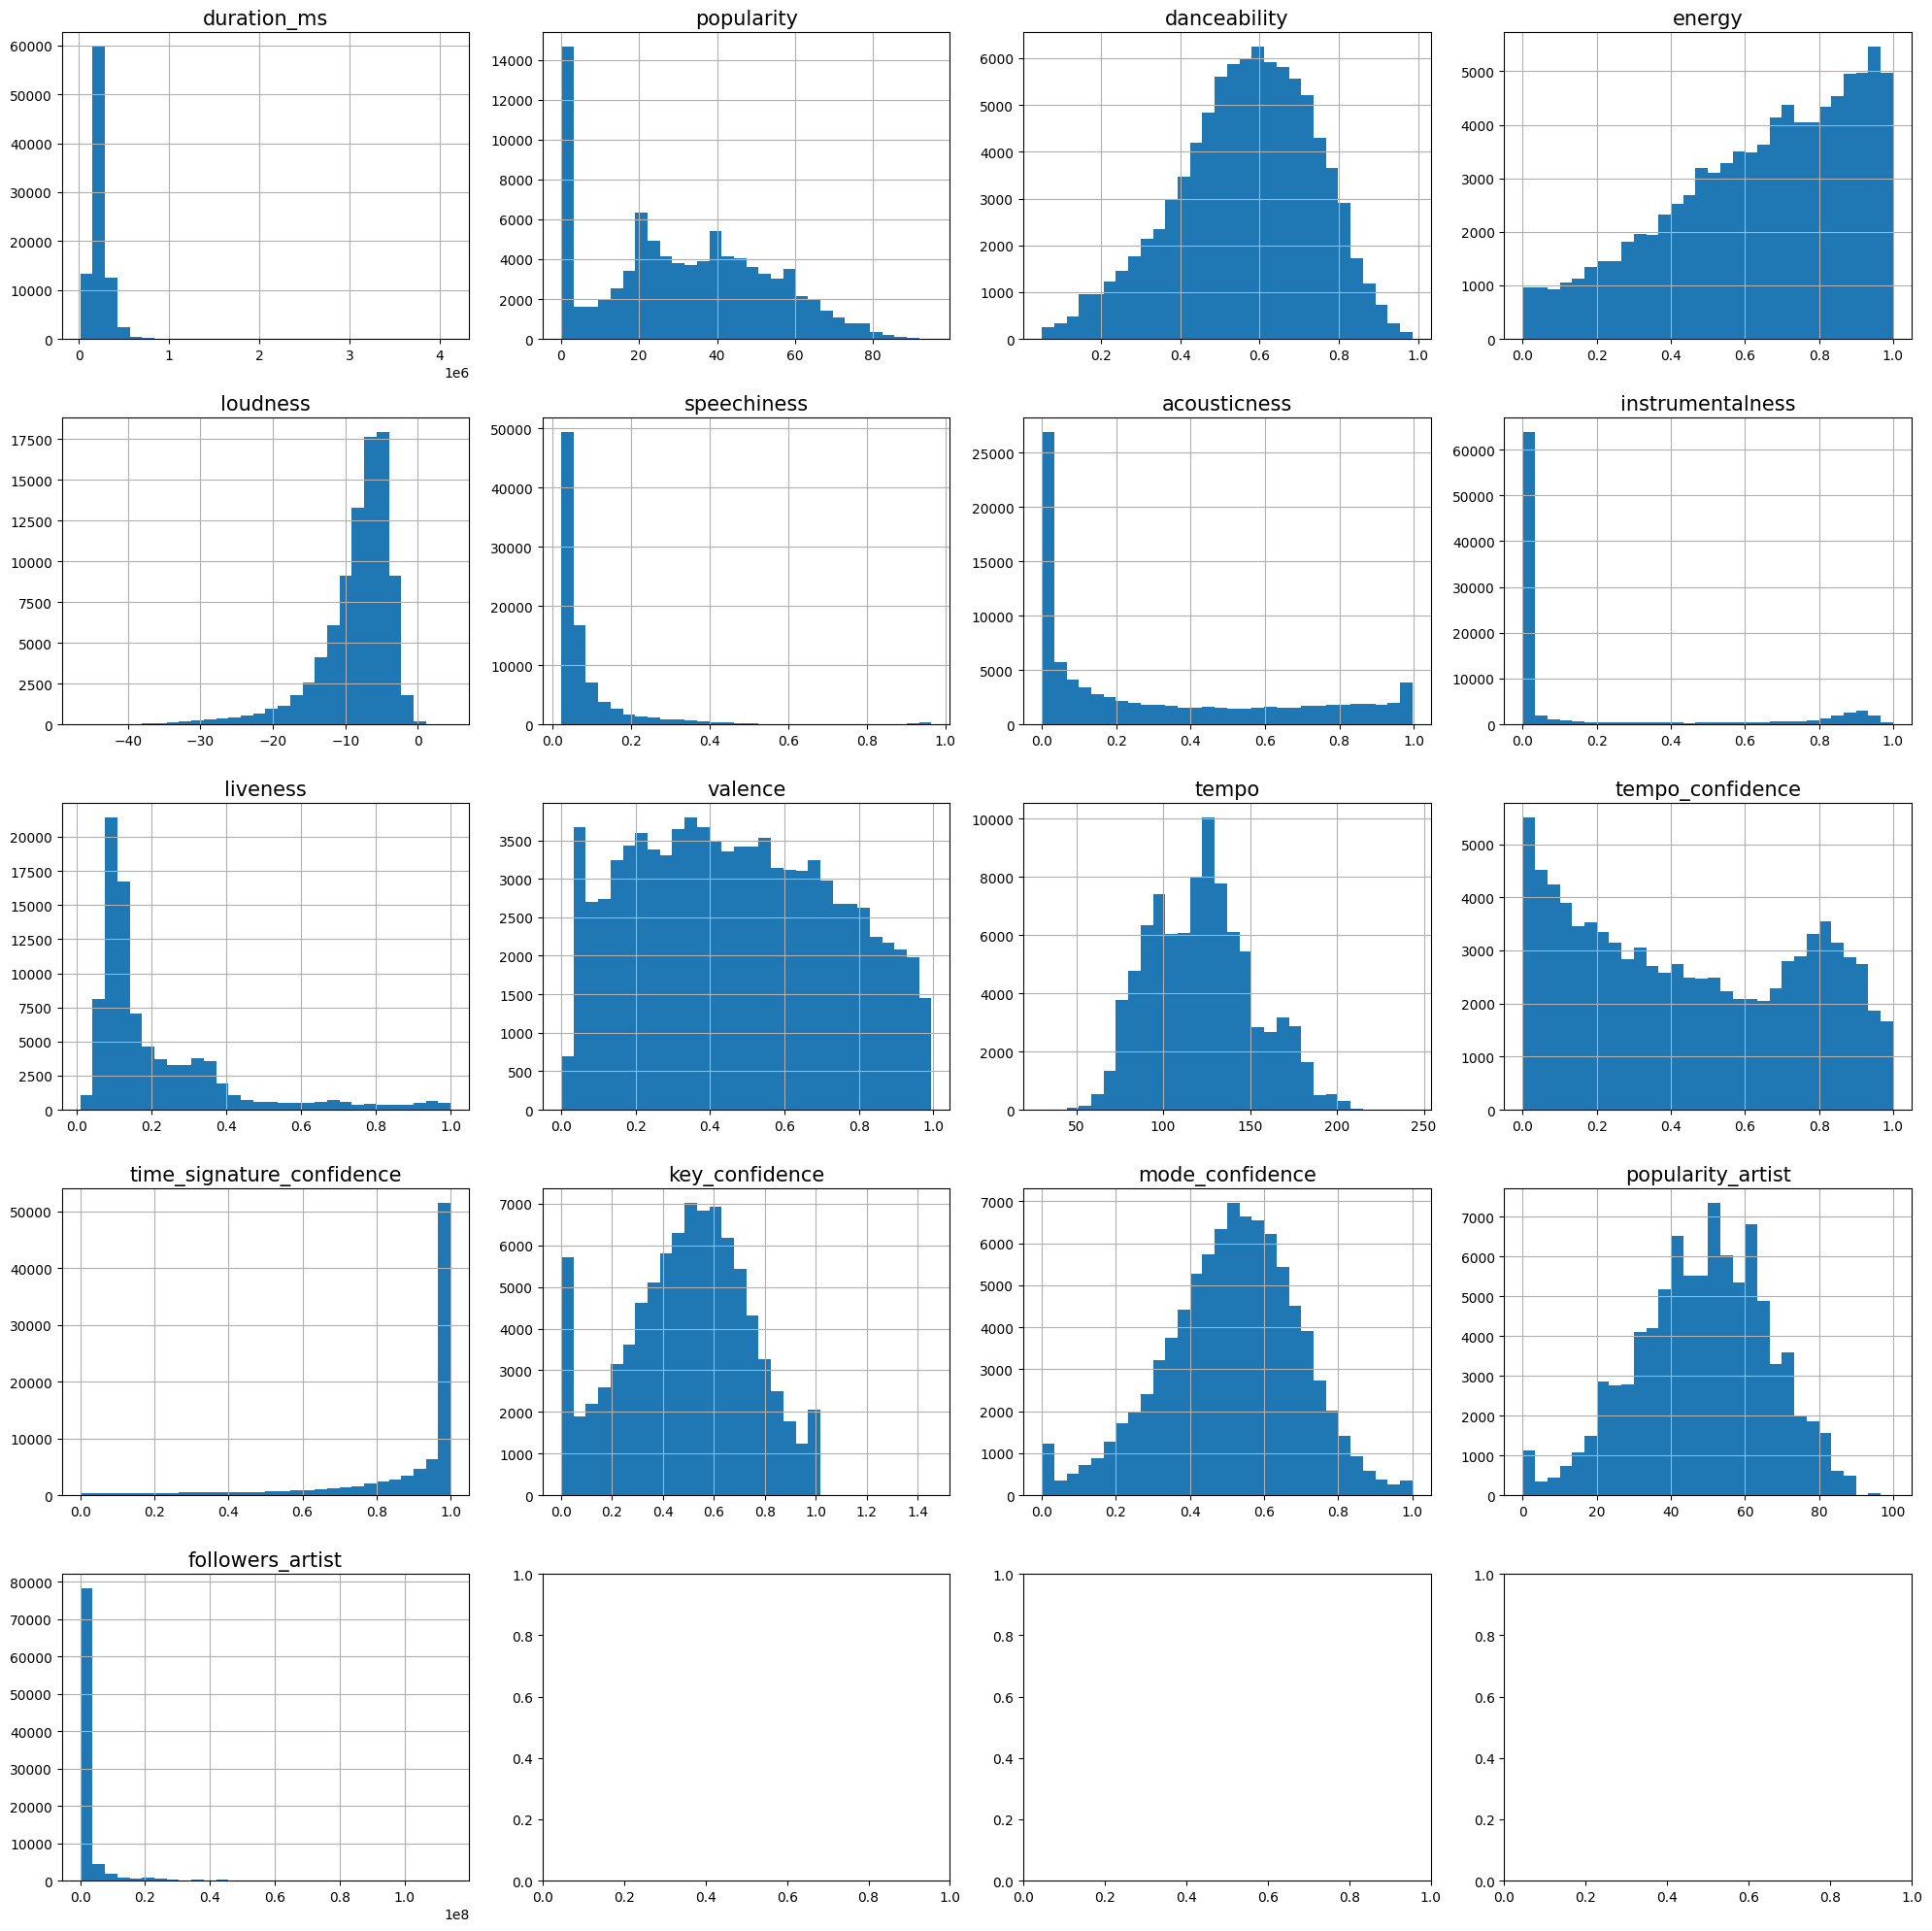

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, var in enumerate(df_num.columns):
    row = i // 4
    col = i % 4
    df[var].hist(bins=30, ax=axes[row][col])
    axes[row][col].set_title(var, fontsize=15)
    
plt.tight_layout()
plt.show()


In [17]:
df[num].columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'popularity_artist',
       'followers_artist'],
      dtype='object')

In [18]:


columns_to_scale = df[num]
columns_to_keep = df[cat]

scaler = StandardScaler()

scaler.fit(columns_to_scale) 
train_scaled = scaler.transform(columns_to_scale)

# Concatenate the scaled columns and the columns to be kept
df = pd.concat([pd.DataFrame(train_scaled, columns= columns_to_scale.columns), columns_to_keep], axis=1)

In [19]:
print(len(num))
print(len(cat))
print(df.shape)

17
6
(88554, 23)


In [20]:
print(len(to_plot))

7


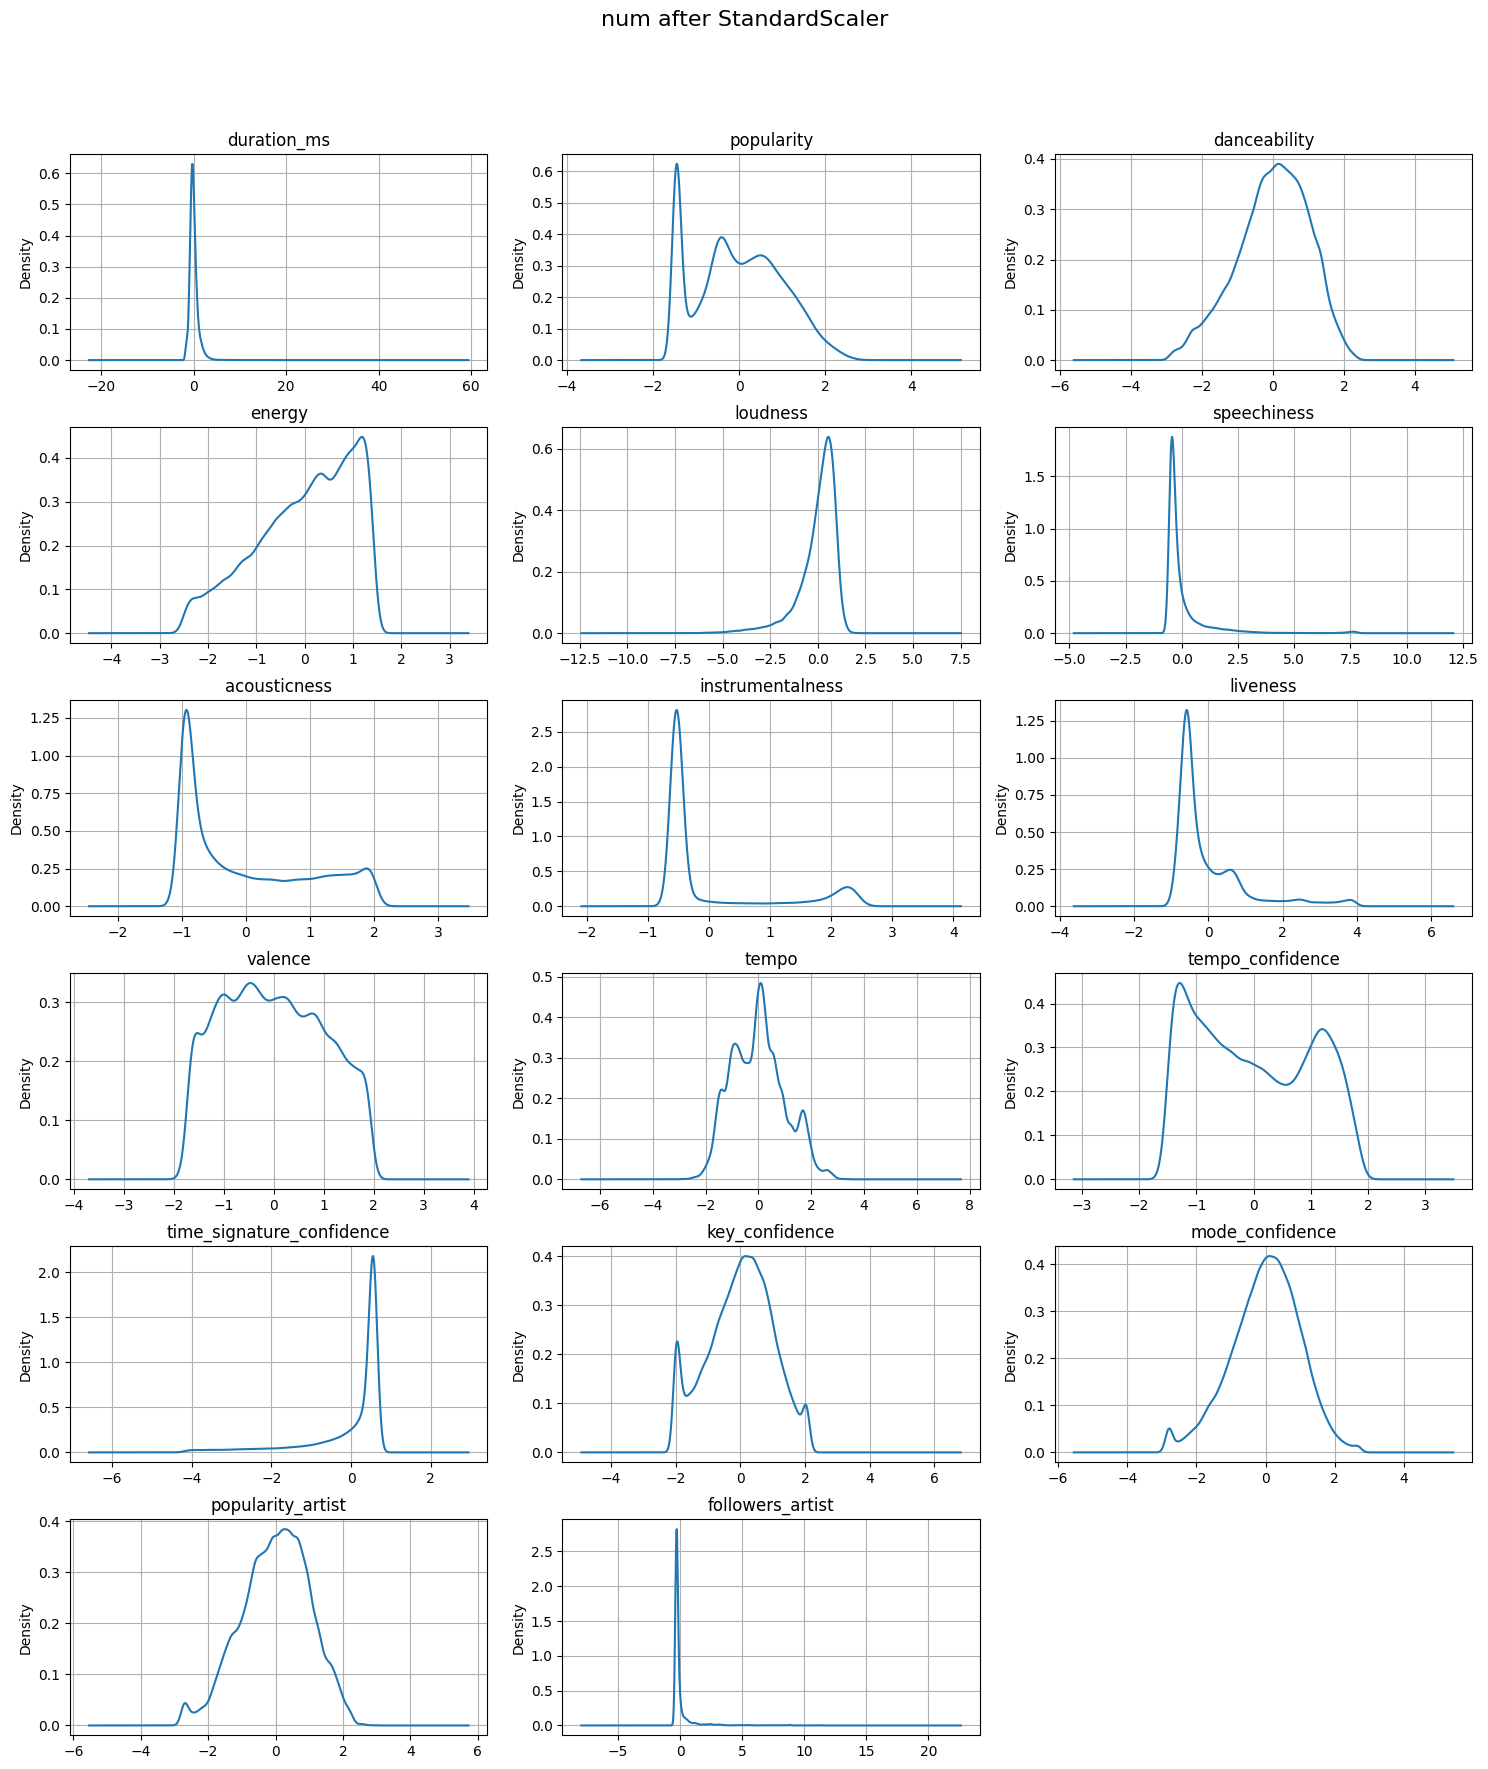

In [21]:
plot_num(num, "num after StandardScaler")

In [22]:
df.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature
count,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,8.855400e+04,88554.000000,88554.000000,88554.000000,88554.000000
mean,-1.439476e-16,6.740022e-17,-1.275790e-17,-1.924918e-16,-1.616000e-16,3.546535e-17,-5.552494e-17,-3.000915e-17,-2.015587e-16,3.751946e-16,-7.478215e-16,-2.423198e-16,4.847199e-16,2.658297e-16,-2.689590e-16,-2.484179e-16,4.076108e-17,0.086986,5.286865,0.636516,3.932121
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.281817,3.560575,0.481005,0.314683
min,-2.128972e+00,-1.461689e+00,-2.938233e+00,-2.501873e+00,-7.436456e+00,-5.824858e-01,-9.656878e-01,-5.322429e-01,-1.067252e+00,-1.799100e+00,-3.106630e+00,-1.484163e+00,-4.196044e+00,-1.977657e+00,-2.803292e+00,-2.721615e+00,-3.066527e-01,0.000000,0.000000,0.000000,3.000000
25%,-5.534738e-01,-7.654970e-01,-6.383242e-01,-6.875367e-01,-3.563341e-01,-4.581432e-01,-9.157217e-01,-5.322429e-01,-6.092593e-01,-8.378785e-01,-7.603806e-01,-9.168125e-01,-9.240406e-02,-6.743836e-01,-6.176269e-01,-6.391880e-01,-3.024795e-01,0.000000,2.000000,0.000000,4.000000
50%,-1.529716e-01,-2.289194e-02,7.735561e-02,1.646888e-01,2.503386e-01,-3.418516e-01,-4.192524e-01,-5.320683e-01,-4.345158e-01,-4.448936e-02,-1.183597e-02,-9.730620e-02,5.121926e-01,6.803842e-02,6.333403e-02,3.619374e-02,-2.808167e-01,0.000000,5.000000,1.000000,4.000000
75%,3.553868e-01,7.661259e-01,7.357811e-01,8.519674e-01,6.508244e-01,-1.086774e-02,8.696226e-01,-2.521714e-01,3.180666e-01,8.099297e-01,5.967851e-01,9.444954e-01,5.645592e-01,7.136228e-01,6.838871e-01,7.115755e-01,-1.545008e-01,0.000000,8.000000,1.000000,4.000000
max,3.888562e+01,2.947528e+00,2.407609e+00,1.425354e+00,2.526579e+00,7.852235e+00,1.992191e+00,2.572763e+00,4.039742e+00,1.996199e+00,4.075167e+00,1.833676e+00,5.645592e-01,3.889091e+00,2.688329e+00,2.906566e+00,1.497066e+01,1.000000,11.000000,1.000000,5.000000


In [23]:
to_plot

['loudness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'time_signature_confidence',
 'followers_artist',
 'duration_ms']

In [33]:

# Assume df è il tuo DataFrame con le variabili
# to_transf è la lista delle colonne da trasformare

# Effettua la trasformazione Box-Cox per ogni variabile nella lista
for col in to_plot:
    # Assicurati che non ci siano valori negativi
    if (df[col] <= 0).any():
        # Shifta i valori per renderli tutti positivi
        df[col] += abs(df[col].min()) + 1

# Applica la trasformazione Box-Cox
for col in to_plot:
    df[col], _ = boxcox(df[col])

# Ora le variabili nel DataFrame sono trasformate usando Box-Cox


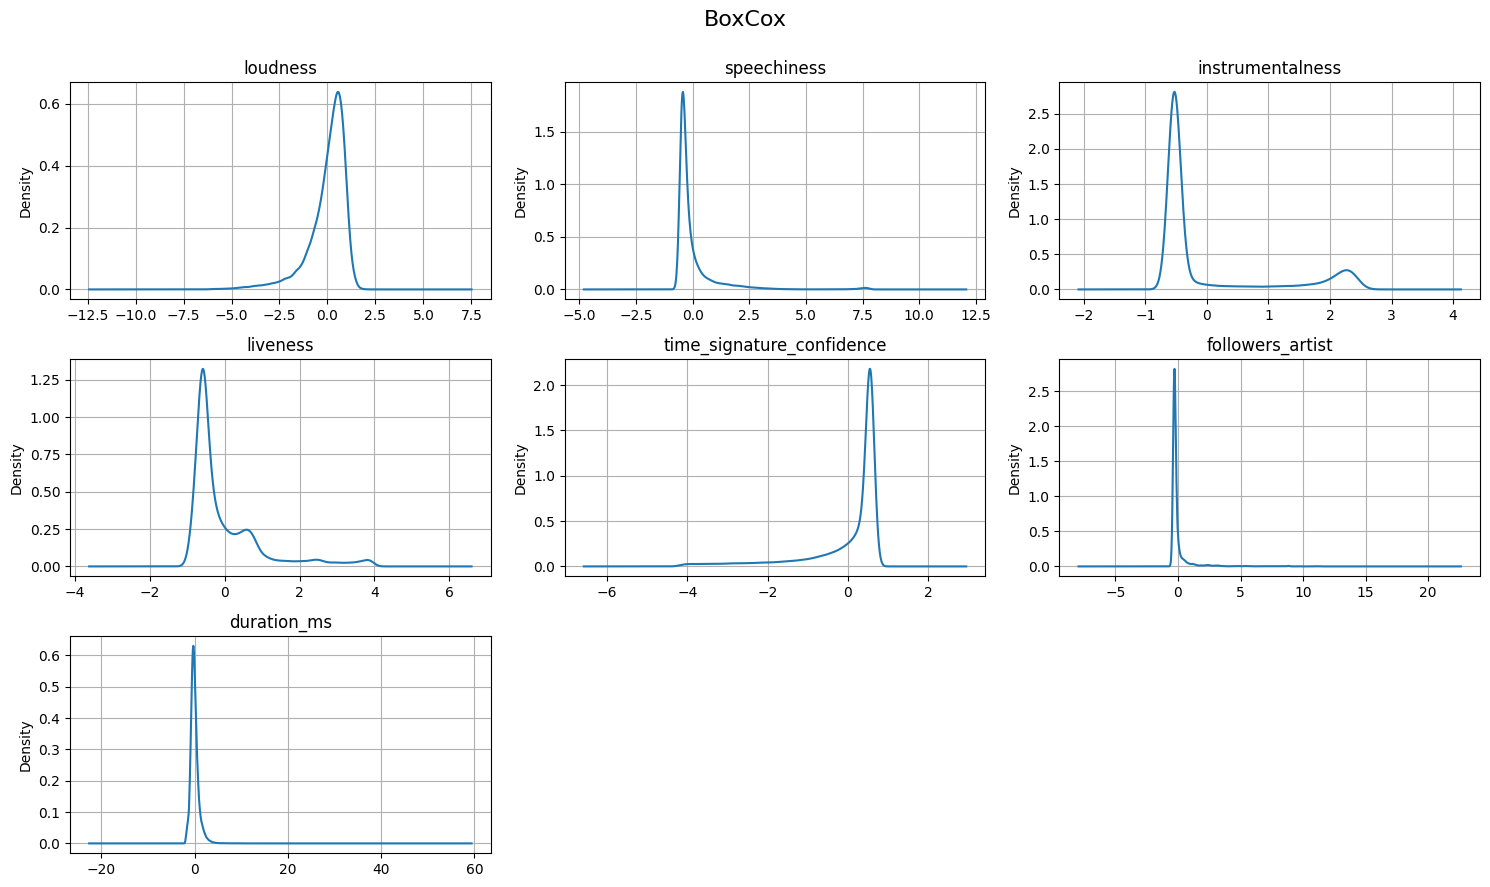

In [25]:
plot_num(to_plot, "BoxCox" )

In [26]:
df.to_csv('Data/Processed/final_df_standard_scaler_box_cox.csv')

In [27]:
df_final = pd.read_csv('Data/Processed/final_df_standard_scaler_box_cox.csv')

In [28]:
df_final_num = df[num]

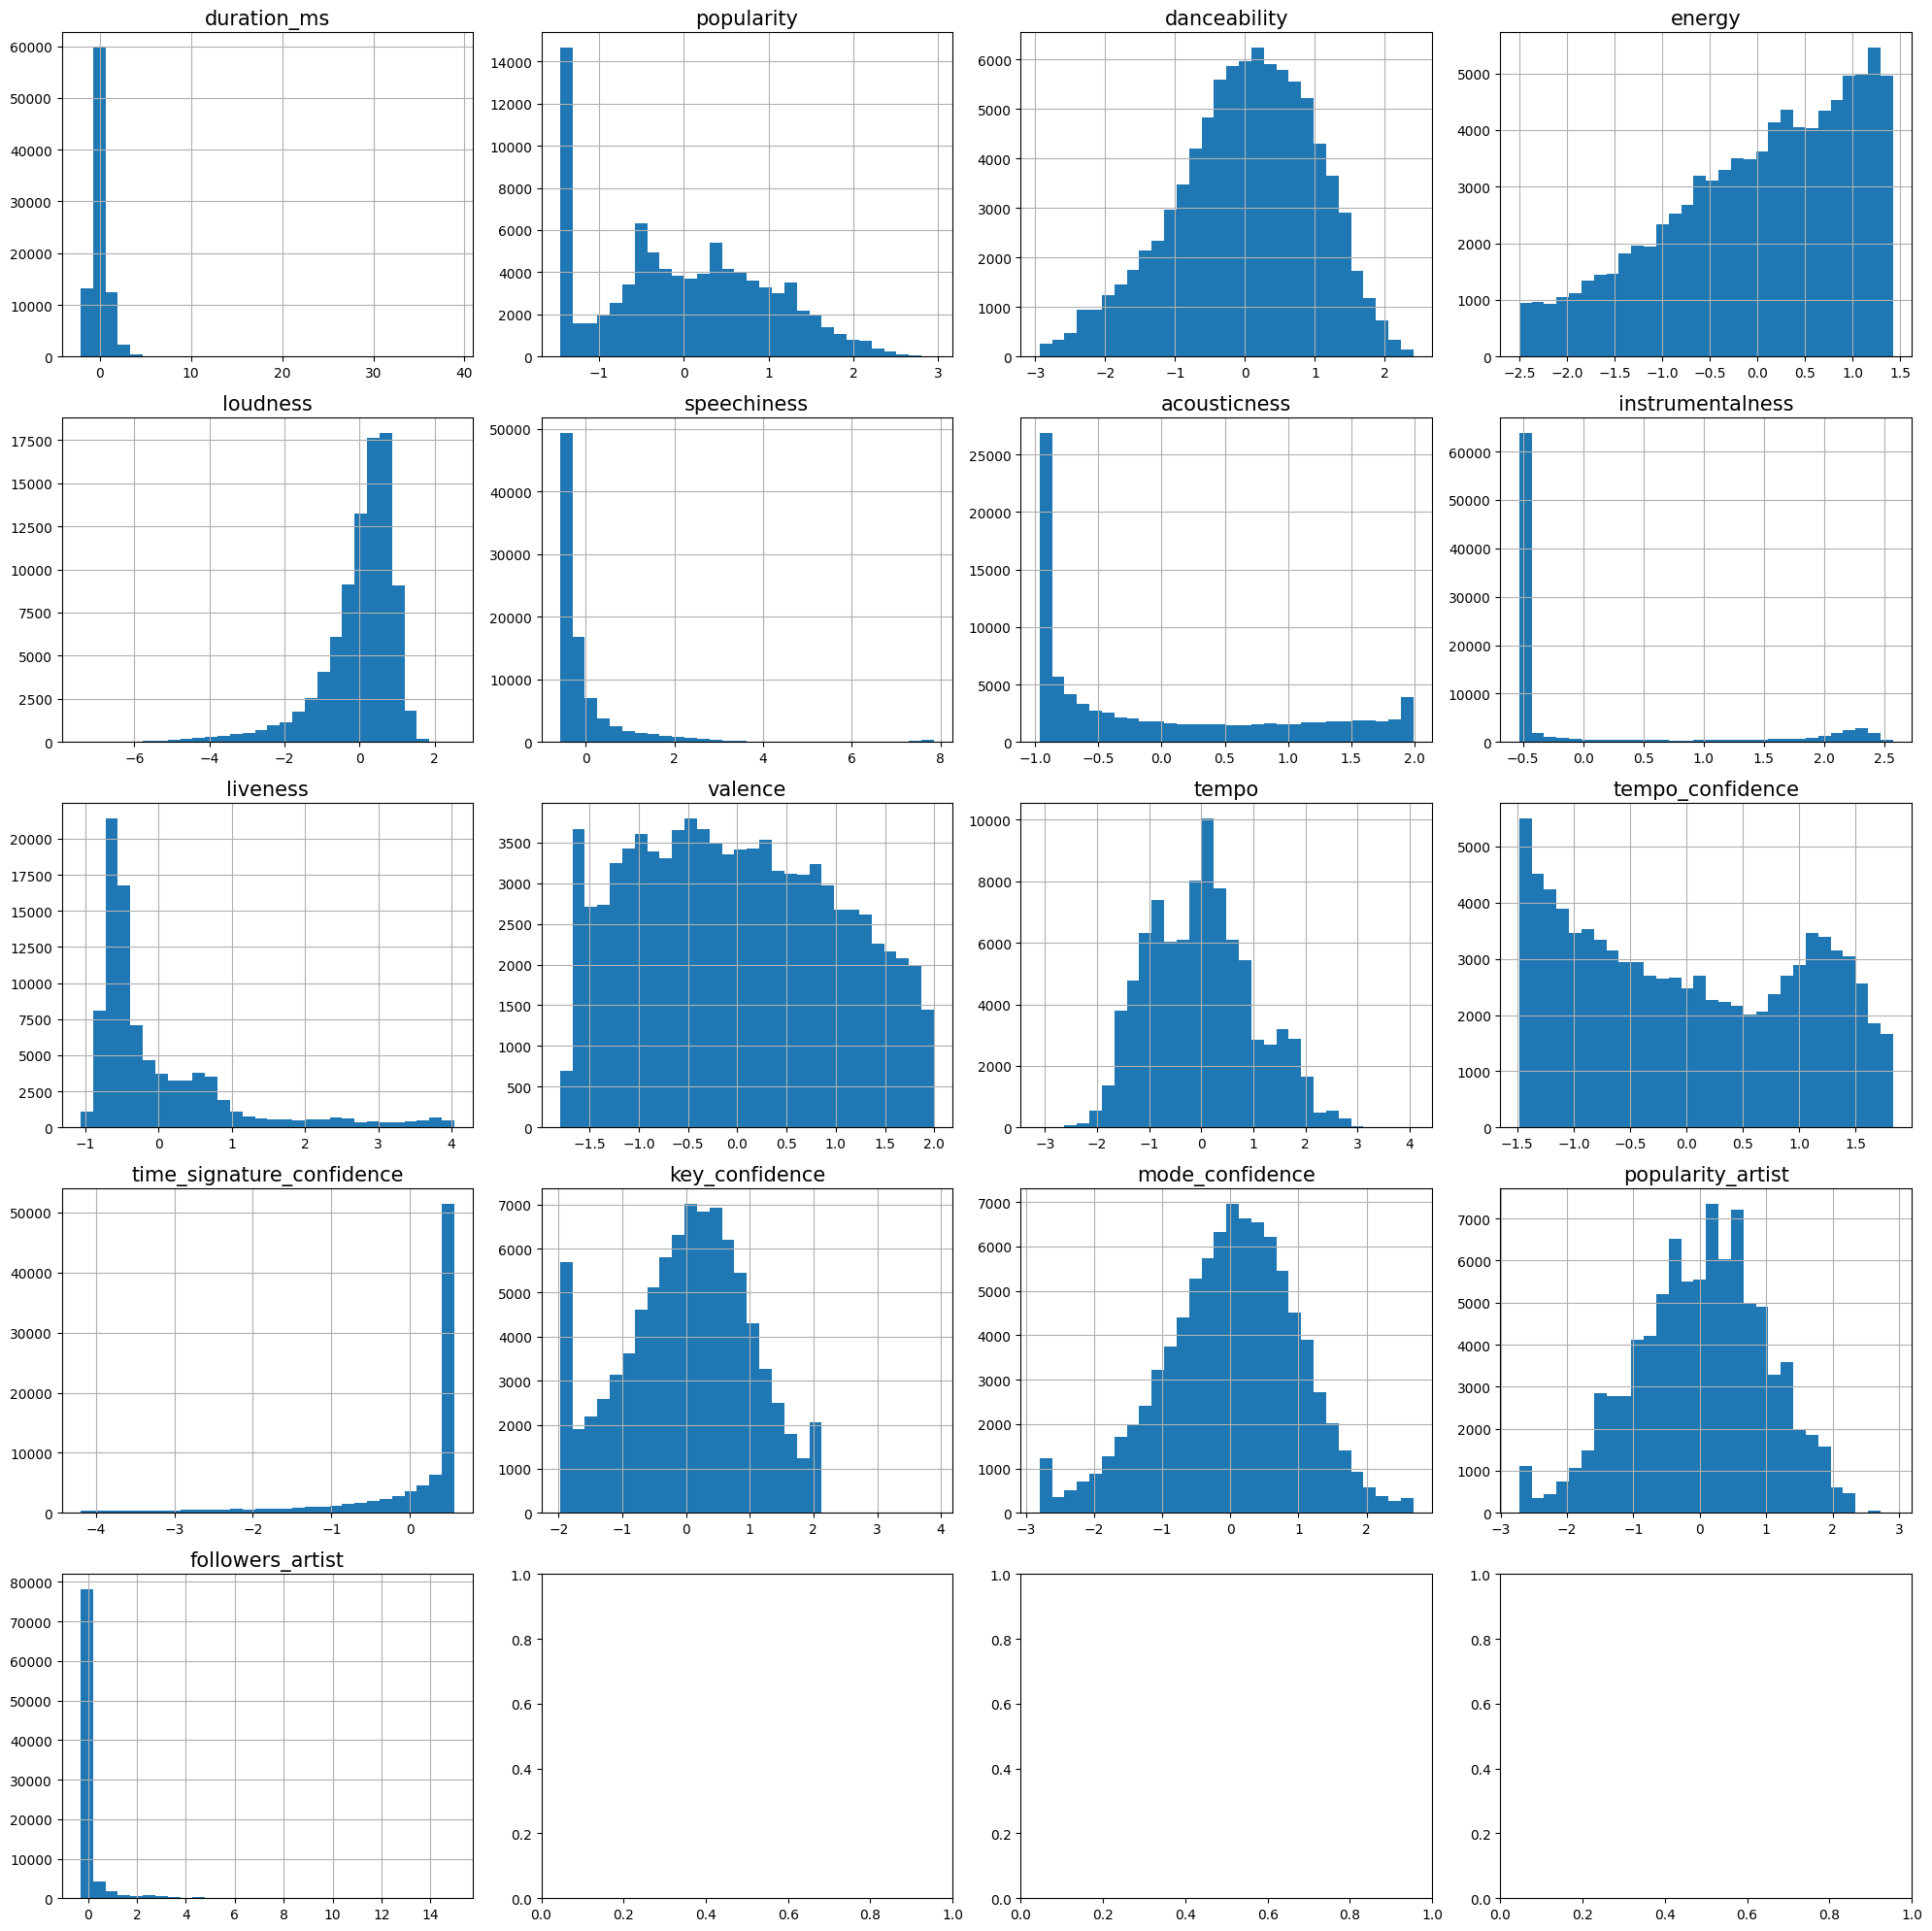

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, var in enumerate(df_num.columns):
    row = i // 4
    col = i % 4
    df[var].hist(bins=30, ax=axes[row][col])
    axes[row][col].set_title(var, fontsize=15)
    
plt.tight_layout()
plt.show()
